<a href="https://colab.research.google.com/github/gurpinder95/my-1st-Data-science/blob/main/practice_visualisation_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
data=pd.read_csv("train.csv")

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [6]:
# Target audience
data.groupby("Survived")["PassengerId"].count()

Survived
0    549
1    342
Name: PassengerId, dtype: int64

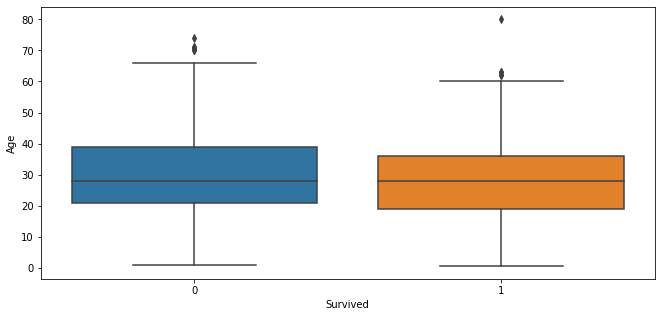

In [7]:
# Visualise survival on basis of age

f, ax=plt.subplots(figsize=(11,5))
sns.boxplot(x="Survived",y="Age",data=data)

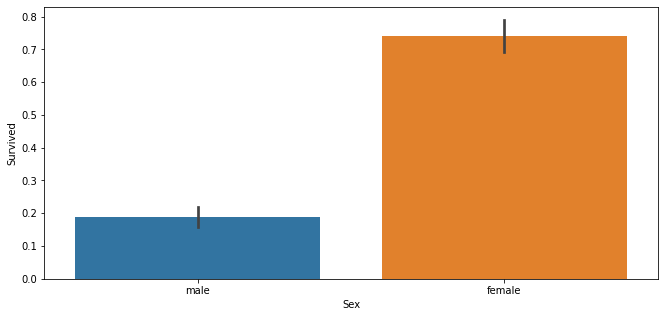

In [8]:
# Doing same on basis of sex barplot
f, ax=plt.subplots(figsize=(11,5))
sns.barplot(x="Sex",y="Survived",data=data);

In [ ]:
# Males and females Survived
data[data["Survived"]==1]["Sex"].value_counts()   

female    233
male      109
Name: Sex, dtype: int64

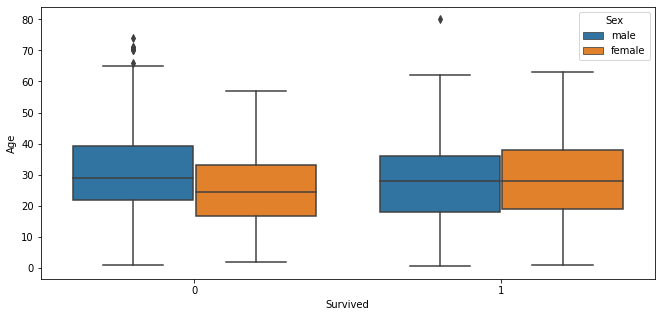

In [ ]:
f, ax=plt.subplots(figsize=(11,5))
sns.boxplot(x="Survived",y="Age",hue="Sex",data=data)

1    136
3    119
2     87
Name: Pclass, dtype: int64

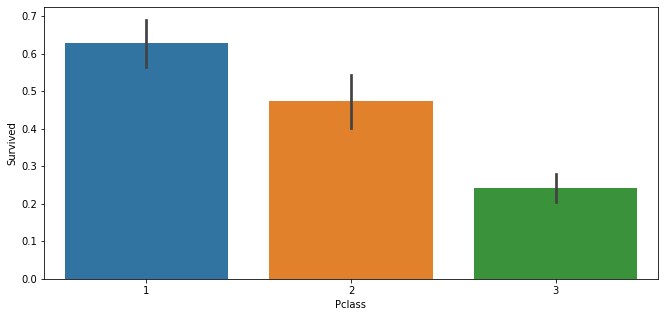

In [ ]:
# Visualising according to pclass
f, ax=plt.subplots(figsize=(11,5))
sns.barplot(x="Pclass",y="Survived",data=data)

#Here we can see pclass3 is lower lets check the actual values

data[data["Survived"]==1]["Pclass"].value_counts()

# Now you can see the pclass3 values are higher than 2, but the thing is pclass 3 has higher no.of people 

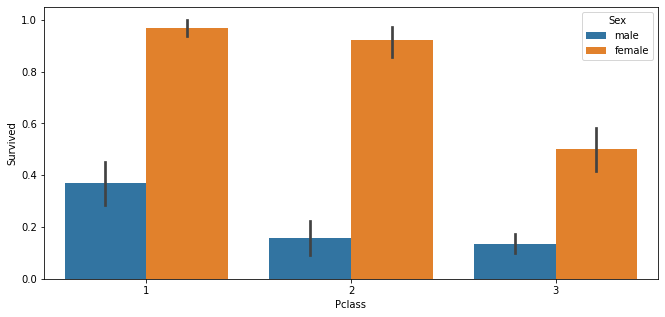

In [ ]:
f, ax=plt.subplots(figsize=(11,5))
sns.barplot(x="Pclass",y="Survived",hue="Sex",data=data)

In [ ]:
# Now i want to see how many people survived in a partcular class
data[(data["Survived"]==1)&(data["Pclass"]==1)]["Sex"].value_counts() 

female    91
male      45
Name: Sex, dtype: int64

In [ ]:
# Lets check how many people went from pclass 1
data[data["Pclass"]==1]["Sex"].value_counts()

male      122
female     94
Name: Sex, dtype: int64

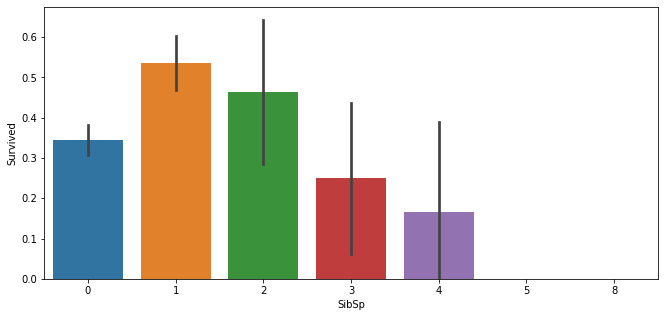

In [9]:
f, ax=plt.subplots(figsize=(11,5))
sns.barplot(x="SibSp",y="Survived",data=data)

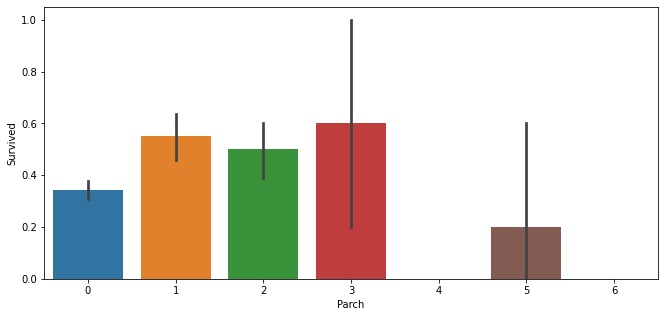

In [12]:
f,ax=plt.subplots(figsize=(11,5))
sns.barplot(x="Parch",y="Survived",data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


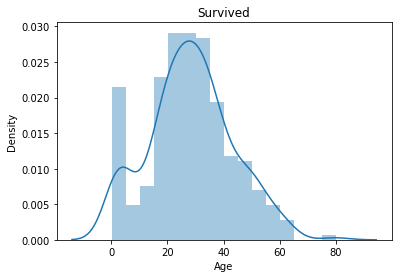

In [22]:
# lets check survived data with distance plot

survived=data.loc[data["Survived"]==1,"Age"].dropna()
sns.distplot(survived)
plt.title("Survived")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


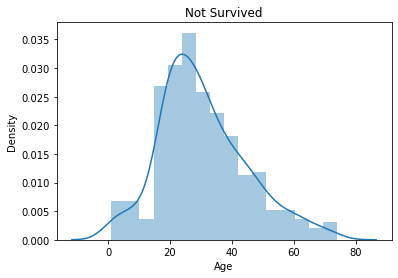

In [21]:
not_survived=data.loc[data["Survived"]==0,"Age"].dropna()
sns.distplot(not_survived)
plt.title("Not Survived")
plt.show()

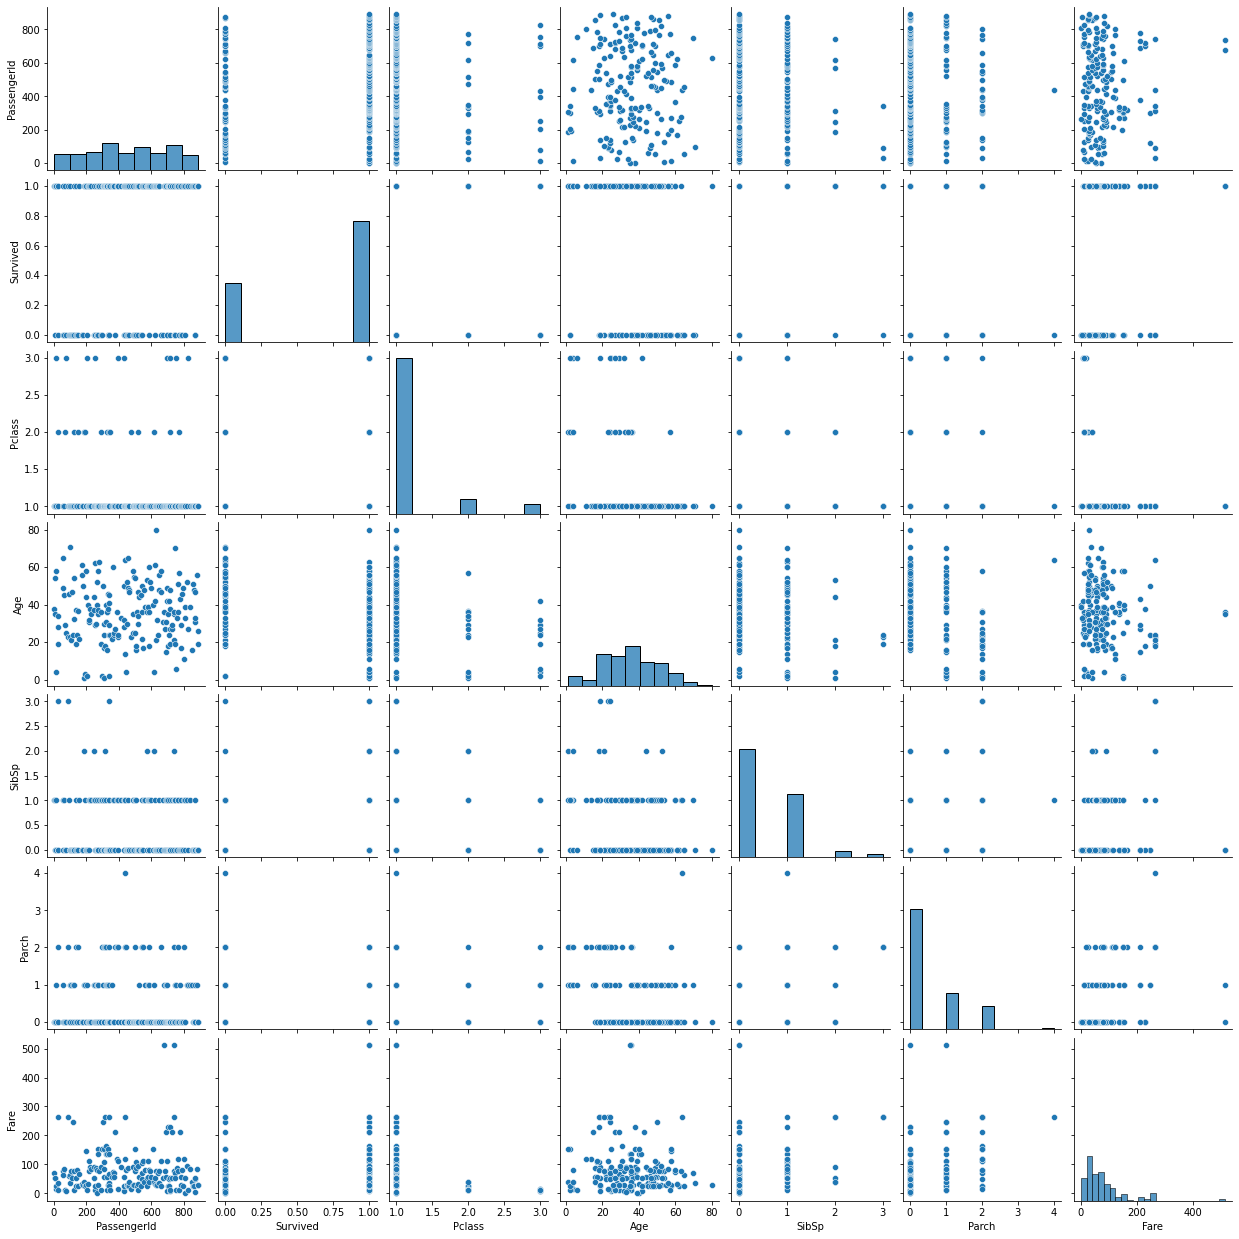

In [25]:
sns.pairplot(data.dropna())

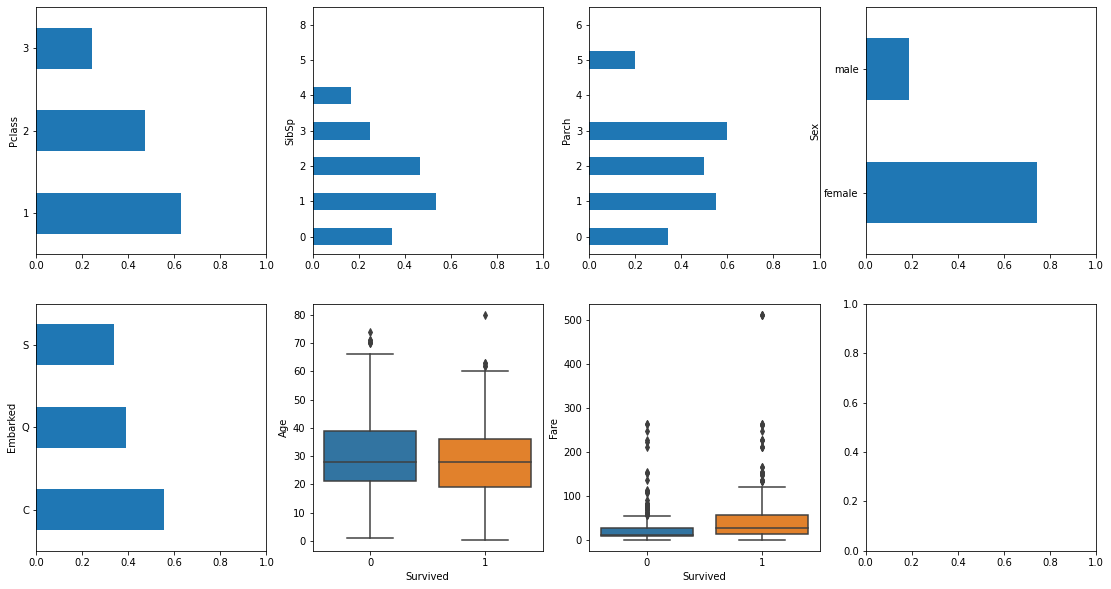

In [48]:
figbi,axesbi=plt.subplots(2,4 ,figsize=(19,10))
data.groupby("Pclass")["Survived"].mean().plot(kind="barh",ax=axesbi[0,0],xlim=[0,1])
data.groupby("SibSp")["Survived"].mean().plot(kind="barh",ax=axesbi[0,1],xlim=[0,1])
data.groupby("Parch")["Survived"].mean().plot(kind="barh",ax=axesbi[0,2],xlim=[0,1])
data.groupby("Sex")["Survived"].mean().plot(kind="barh",ax=axesbi[0,3],xlim=[0,1])
data.groupby("Embarked")["Survived"].mean().plot(kind="barh",ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x="Survived",y="Age",data=data,ax=axesbi[1,1])
sns.boxplot(x="Survived",y="Fare",data=data,ax=axesbi[1,2])

